In [1]:
# add library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import warnings
import matplotlib as mpl
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier

In [2]:
data_file = './data/GSE66099.csv'
degs_file = './gene_diff_data.csv'
# data pre-processing
norm_filter = MinMaxScaler()

label = 'Died'
num_features = 10

DEGs = pd.read_csv(degs_file)
degs_gene_id = DEGs["X"]

data = pd.read_csv(data_file)
degs_gene_data = data[degs_gene_id]
degs_gene_data.loc[:,"label"]  = data[label]
degs_gene_data

C:\Users\vuduc\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\vuduc\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,SLC39A8,RHAG,DDIT4,MPO,RRM2,CCL3,TGFBI,MAFF,TYMS,ENPP2,...,FEN1,AURKA,FRAT1,SNRPG,KIF2C,POLE2,UBE2C,AURKB,CENPF,label
0,7.837760,4.112866,8.046405,2.324069,4.759059,3.140721,4.143039,8.578116,5.230842,3.862937,...,4.062130,3.009849,8.785775,9.787393,2.240854,2.622261,4.787508,3.002504,2.246339,1
1,7.751983,1.485795,8.971049,5.258546,7.684430,2.811141,4.977650,4.715507,7.567845,3.212268,...,4.651380,4.084429,8.823993,9.877403,3.083158,2.470562,5.049623,2.667229,3.301098,0
2,10.279053,1.925620,8.712714,1.856427,5.890788,5.947866,4.036440,9.109963,6.066830,3.086101,...,3.554817,2.921564,8.135534,10.673182,2.399208,2.270243,4.136699,3.181530,2.663032,1
3,9.601609,5.888388,8.527441,5.750055,8.206514,5.134266,4.616064,5.156271,8.057016,2.684719,...,5.330526,4.034944,7.884369,9.025149,3.205451,2.998327,5.846744,3.883344,3.662963,1
4,7.785195,4.846312,9.301229,8.695507,10.032503,6.555199,6.542890,8.041716,9.813448,7.125344,...,6.783366,6.314857,8.603358,10.328848,4.966912,4.004817,6.864789,5.244933,4.199692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,7.181331,2.365467,8.184828,6.181315,7.871825,2.929050,7.998090,4.431776,7.034406,3.780909,...,4.477342,4.055716,8.839066,9.910092,2.871094,3.078237,3.940554,3.216972,3.462929,0
195,5.251613,2.714796,6.427088,3.523980,7.221401,2.154800,4.979873,7.541867,7.252205,2.629904,...,5.162441,3.987030,9.600255,6.991776,2.501947,2.859321,4.154692,3.430309,3.199781,0
196,5.905524,8.074482,6.259182,2.492298,5.146876,1.794615,8.446067,8.769124,4.142922,2.246056,...,4.168839,4.630949,7.698138,9.373841,2.188718,2.145200,4.212061,2.516086,2.280285,0
197,4.786756,2.279402,5.955421,8.199064,8.008226,3.352024,9.477510,5.653967,7.454457,2.954322,...,4.676477,4.053300,8.976000,6.692781,2.799296,2.676570,4.434418,3.215429,3.070606,0


In [3]:
# split data 7/3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# y = degs_gene_data.iloc[:,108].values
X, y = degs_gene_data.iloc[:,0:108].values, degs_gene_data.iloc[:,108].values

# Normalize data
mm = MinMaxScaler()
mm.fit(X)
X_ = mm.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.3, random_state=1234,
                                                   shuffle=True, stratify=y)

In [4]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,0.393239,0.043367,0.750394,0.057558,0.758201,0.151733,0.190277,0.584129,0.791770,0.354312,...,0.210145,0.608228,0.500949,0.489528,0.906520,0.539472,0.638975,0.539266,0.600088,0.949873
1,0.326627,0.078190,0.440107,0.022222,0.220582,0.071600,0.845126,0.508473,0.208496,0.136352,...,0.366726,0.226045,0.124869,0.686099,0.712927,0.130329,0.216578,0.058211,0.028148,0.175808
2,0.291350,0.382475,0.195437,0.273424,0.159836,0.068425,0.740780,0.222803,0.168297,0.080475,...,0.190698,0.229310,0.160819,0.681419,0.418838,0.128583,0.099180,0.155510,0.272185,0.293026
3,0.075038,0.303574,0.199618,0.230697,0.229144,0.129347,0.854857,0.304306,0.212281,0.114555,...,0.209938,0.440485,0.123163,0.627428,0.707258,0.053988,0.189372,0.213784,0.128740,0.153944
4,0.254301,0.484013,0.657063,0.238586,0.322230,0.027077,0.431366,0.507810,0.349073,0.187171,...,0.454191,0.314615,0.182384,0.725432,0.676899,0.147902,0.197477,0.338757,0.238949,0.295368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.437675,0.732919,0.552963,0.500667,0.453641,0.124738,0.779948,0.492242,0.327443,0.157294,...,0.191134,0.327951,0.321868,0.339456,0.710685,0.203249,0.319740,0.151739,0.169583,0.398990
135,0.499111,0.108765,0.370084,0.163719,0.335494,0.115582,0.842982,0.672600,0.296201,0.495734,...,0.334751,0.332651,0.210892,0.504298,0.804306,0.195360,0.250205,0.199672,0.196571,0.319370
136,0.536449,0.079594,0.324067,0.087539,0.318406,0.047349,0.187711,0.523702,0.366003,0.384129,...,0.273161,0.276381,0.284304,0.769976,0.748772,0.181691,0.110133,0.304202,0.260349,0.216802
137,0.271292,0.183380,0.855663,0.350887,0.507578,0.149636,0.897489,0.271187,0.528923,0.061091,...,0.286938,0.474534,0.241468,0.758191,0.644665,0.174664,0.170810,0.268472,0.247060,0.181911


<BarContainer object of 139 artists>

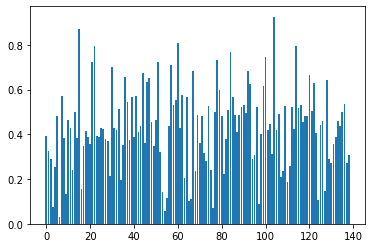

In [5]:
plt.bar(list(range(139)),X_train[0:139,0])

In [12]:
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)

print('Training accuracy:', np.mean(rf.predict(X_train) == y_train)*100)
print('Test accuracy:', np.mean(rf.predict(X_test) == y_test)*100)

Training accuracy: 100.0
Test accuracy: 91.66666666666666


In [13]:
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)